## Part 1

### Loading the datasets
#### 1. Confirmed URL : https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv
#### 2. Deaths URL: https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv
#### 3. Recovered URL: https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv

#### Starting date on all three datasets is 22/01/2020

Steps (Without BeautifulSoup):-
1. Import the CSV 
2. Check if the last column title matches with the last date row in the cleaned dataset.
3. If it matches, don't add it to the dataset. 
4. If it does not match, go back iteratively until it matches and save all of the data.


In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
import requests
from bs4 import BeautifulSoup
from datetime import date
import warnings
from matplotlib.pyplot import figure
from matplotlib.ticker import ScalarFormatter
warnings.filterwarnings("ignore")
today = date.today()
from matplotlib.ticker import ScalarFormatter
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=True)
ax.yaxis.set_major_formatter(y_formatter)

In [186]:
confirmed_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovered_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

In [187]:
d1 = today.strftime("%m/%d/%y").replace(' 0', ' ')
d1

'06/19/20'

### Function to get the number of confirmed cases as a Dataframe

In [188]:
def get_confirmed():
    con_casesnew = pd.read_csv(confirmed_url)
    con_casesnew = con_casesnew.sum(axis=0)
    con_casesnew.drop(["Country/Region","Lat","Long"], axis=0, inplace=True)
    con_casesnew = pd.DataFrame(con_casesnew)
    con_casesnew.rename(columns={0: "Infected"}, inplace=True)
    return con_casesnew

### Function to get the number of deaths as a Dataframe

In [189]:
def get_deaths():
    deaths_new = pd.read_csv(deaths_url)
    deaths_new = deaths_new.sum(axis=0)
    deaths_new.drop(["Country/Region","Lat","Long"], axis=0, inplace=True)
    deaths_new = pd.DataFrame(deaths_new)
    deaths_new.rename(columns={0: "Deaths"}, inplace=True)
    return deaths_new

### Function to get the number of recoveries as a Dataframe

In [190]:
def get_recoveries():
    rec_new = pd.read_csv(recovered_url)
    rec_new = rec_new.sum(axis=0)
    rec_new.drop(["Country/Region","Lat","Long"], axis=0, inplace=True)
    rec_new = pd.DataFrame(rec_new)
    rec_new.rename(columns={0: "Recovered"}, inplace=True)
    
    return rec_new

### Scraper

In [191]:
def get_newvals():
    url_wminfo = "https://www.worldometers.info/coronavirus/"
    page = requests.get(url_wminfo)
    soup = BeautifulSoup(page.content, 'html.parser')
    result = soup.find_all("div", {"id":"maincounter-wrap"})
    numbers = []
    for r in result:
        numbers.append(int(r.text.split(':')[-1].replace(',','').replace(' ','')))
    return numbers

In [192]:
numbers = get_newvals()
numbers

[8614657, 457025, 4562185]

## Forecasting Confirmed Cases

In [193]:
df_conf = get_confirmed()
df_conf.tail()

,Infected
6/14/20,7912426
6/15/20,8034461
6/16/20,8173940
6/17/20,8349950
6/18/20,8488976


In [194]:
scaler = MinMaxScaler()
train_conf = df_conf
scaler.fit(train_conf)
train_conf = scaler.transform(train_conf)

In [195]:
n_input = 1
n_features = 1
generator_conf = TimeseriesGenerator(train_conf, train_conf, length=n_input, batch_size=6)
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [196]:
model.fit_generator(generator_conf,epochs=150)

Epoch 1/150
25/25 [==============================] - 3s 102ms/step - loss: 0.1636
Epoch 2/150
25/25 [==============================] - 1s 37ms/step - loss: 0.1275
Epoch 3/150
25/25 [==============================] - 1s 31ms/step - loss: 0.0953
Epoch 4/150
25/25 [==============================] - 0s 18ms/step - loss: 0.0727
Epoch 5/150
25/25 [==============================] - 1s 24ms/step - loss: 0.0572
Epoch 6/150
25/25 [==============================] - 1s 27ms/step - loss: 0.0489
Epoch 7/150
25/25 [==============================] - 1s 21ms/step - loss: 0.0410
Epoch 8/150
25/25 [==============================] - 1s 24ms/step - loss: 0.0367
Epoch 9/150
25/25 [==============================] - 1s 22ms/step - loss: 0.0299
Epoch 10/150
25/25 [==============================] - 0s 20ms/step - loss: 0.0264
Epoch 11/150
25/25 [==============================] - 1s 23ms/step - loss: 0.0236
Epoch 12/150
25/25 [==============================] - 1s 25ms/step - loss: 0.0176
Epoch 13/150
25/25 [====

25/25 [==============================] - 1s 24ms/step - loss: 5.2045e-04
Epoch 98/150
25/25 [==============================] - 0s 20ms/step - loss: 4.4206e-04
Epoch 99/150
25/25 [==============================] - 1s 25ms/step - loss: 7.0031e-04
Epoch 100/150
25/25 [==============================] - 0s 19ms/step - loss: 5.9916e-04
Epoch 101/150
25/25 [==============================] - 1s 23ms/step - loss: 6.8404e-04
Epoch 102/150
25/25 [==============================] - 1s 27ms/step - loss: 5.0198e-04
Epoch 103/150
25/25 [==============================] - 1s 22ms/step - loss: 5.5814e-04
Epoch 104/150
25/25 [==============================] - 1s 24ms/step - loss: 7.0453e-04
Epoch 105/150
25/25 [==============================] - 1s 29ms/step - loss: 5.1506e-04
Epoch 106/150
25/25 [==============================] - 1s 29ms/step - loss: 4.7192e-04
Epoch 107/150
25/25 [==============================] - 1s 29ms/step - loss: 5.2189e-04
Epoch 108/150
25/25 [==============================] - 1s 2

In [197]:
pred_list_conf = []
batch = train_conf[-n_input:].reshape((1, n_input, n_features))
for i in range(n_input):   
    pred_list_conf.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list_conf[i]]],axis=1)

In [198]:
pred_list_conf = scaler.inverse_transform(pred_list_conf)
fc_conf = pred_list_conf[0][0]
fc_conf

8740332.633284211

## Forecasting Deaths

In [199]:
df_dea = get_deaths()
df_dea.tail()

,Deaths
6/14/20,433391
6/15/20,436899
6/16/20,443685
6/17/20,448959
6/18/20,453981


In [200]:
train_dea = df_dea
scaler.fit(train_dea)
train_dea = scaler.transform(train_dea)

In [201]:
n_input = 1
n_features = 1
generator_dea = TimeseriesGenerator(train_dea, train_dea, length=n_input, batch_size=6)
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [202]:
model.fit_generator(generator_dea,epochs=150)

Epoch 1/150
25/25 [==============================] - 2s 97ms/step - loss: 0.1979
Epoch 2/150
25/25 [==============================] - 1s 28ms/step - loss: 0.1547
Epoch 3/150
25/25 [==============================] - 1s 27ms/step - loss: 0.1128
Epoch 4/150
25/25 [==============================] - 1s 26ms/step - loss: 0.0847
Epoch 5/150
25/25 [==============================] - 1s 27ms/step - loss: 0.0654
Epoch 6/150
25/25 [==============================] - 1s 20ms/step - loss: 0.0524
Epoch 7/150
25/25 [==============================] - 1s 27ms/step - loss: 0.0440
Epoch 8/150
25/25 [==============================] - 1s 26ms/step - loss: 0.0369
Epoch 9/150
25/25 [==============================] - 1s 25ms/step - loss: 0.0322
Epoch 10/150
25/25 [==============================] - 1s 29ms/step - loss: 0.0264
Epoch 11/150
25/25 [==============================] - 1s 36ms/step - loss: 0.0227
Epoch 12/150
25/25 [==============================] - 1s 28ms/step - loss: 0.0178
Epoch 13/150
25/25 [=====

25/25 [==============================] - 1s 32ms/step - loss: 0.0010
Epoch 100/150
25/25 [==============================] - 1s 35ms/step - loss: 9.4422e-04
Epoch 101/150
25/25 [==============================] - 1s 39ms/step - loss: 0.0012
Epoch 102/150
25/25 [==============================] - 1s 34ms/step - loss: 0.0011
Epoch 103/150
25/25 [==============================] - 1s 35ms/step - loss: 9.5559e-04
Epoch 104/150
25/25 [==============================] - 1s 33ms/step - loss: 7.2042e-04
Epoch 105/150
25/25 [==============================] - 1s 24ms/step - loss: 8.5186e-04
Epoch 106/150
25/25 [==============================] - 1s 28ms/step - loss: 0.0011
Epoch 107/150
25/25 [==============================] - 1s 34ms/step - loss: 7.3313e-04
Epoch 108/150
25/25 [==============================] - 1s 28ms/step - loss: 0.0010
Epoch 109/150
25/25 [==============================] - 1s 33ms/step - loss: 9.3068e-04
Epoch 110/150
25/25 [==============================] - 1s 23ms/step - loss: 0

In [203]:
pred_list_dea = []
batch = train_dea[-n_input:].reshape((1, n_input, n_features))
for i in range(n_input):   
    pred_list_dea.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list_dea[i]]],axis=1)

In [204]:
pred_list_dea = scaler.inverse_transform(pred_list_dea)
fc_dea = pred_list_dea[0][0]
fc_dea

465171.2565860748

## Forecasting Recoveries

In [205]:
df_rec = get_recoveries()
df_rec.tail()

,Recovered
6/14/20,3777131
6/15/20,3857338
6/16/20,3955169
6/17/20,4073955
6/18/20,4155099


In [206]:
train_rec = df_rec
scaler.fit(train_rec)
train_rec = scaler.transform(train_rec)

In [207]:
n_input = 1
n_features = 1
generator_rec = TimeseriesGenerator(train_rec, train_rec, length=n_input, batch_size=6)
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [208]:
model.fit_generator(generator_rec,epochs=90)

Epoch 1/90
25/25 [==============================] - 3s 116ms/step - loss: 0.1176
Epoch 2/90
25/25 [==============================] - 1s 36ms/step - loss: 0.0938
Epoch 3/90
25/25 [==============================] - 1s 37ms/step - loss: 0.0772
Epoch 4/90
25/25 [==============================] - 1s 40ms/step - loss: 0.0624
Epoch 5/90
25/25 [==============================] - 1s 34ms/step - loss: 0.0557
Epoch 6/90
25/25 [==============================] - 1s 37ms/step - loss: 0.0484
Epoch 7/90
25/25 [==============================] - 1s 39ms/step - loss: 0.0446
Epoch 8/90
25/25 [==============================] - 1s 38ms/step - loss: 0.0389
Epoch 9/90
25/25 [==============================] - 1s 30ms/step - loss: 0.0336
Epoch 10/90
25/25 [==============================] - 1s 28ms/step - loss: 0.0309
Epoch 11/90
25/25 [==============================] - 1s 28ms/step - loss: 0.0280
Epoch 12/90
25/25 [==============================] - 1s 33ms/step - loss: 0.0221
Epoch 13/90
25/25 [=================

In [209]:
pred_list_rec = []
batch = train_rec[-n_input:].reshape((1, n_input, n_features))
for i in range(n_input):   
    pred_list_rec.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list_rec[i]]],axis=1)

In [210]:
pred_list_rec = scaler.inverse_transform(pred_list_rec)
fc_rec = pred_list_rec[0][0]
fc_rec

4377056.235995054

## Summary

In [211]:
def get_summary():
    print("Date", d1, "\n")
    print("Confirmed cases Yesterday:", df_conf.iloc[-1]['Infected'])
    print("Current confirmed cases per Worldometers(LIVE)", numbers[0])
    print("Confirmed cases forecasted by model", int(fc_conf), "\n")
    print("Deaths Yesterday:", df_dea.iloc[-1]['Deaths'])
    print("Current deaths per Worldometers(LIVE)", numbers[1])
    print("Deaths forecasted by model", int(fc_dea), "\n")
    print("Recoveries Yesterday:", df_rec.iloc[-1]['Recovered'])
    print("Current recoveries per Worldometers", numbers[2])
    print("Recoveries forecasted by model", int(fc_rec), "\n")
get_summary()

Date 06/19/20 

Confirmed cases Yesterday: 8488976
Current confirmed cases per Worldometers(LIVE) 8614657
Confirmed cases forecasted by model 8740332 

Deaths Yesterday: 453981
Current deaths per Worldometers(LIVE) 457025
Deaths forecasted by model 465171 

Recoveries Yesterday: 4155099
Current recoveries per Worldometers 4562185
Recoveries forecasted by model 4377056 



In [212]:
summary_conf = pd.DataFrame(columns=['Date', 'Type', "Previous Day", 'Live Data', 'Forecasted Data'])
summary_conf = summary_conf.append({'Date': d1, 'Type' : 'Infected', "Previous Day": df_conf.iloc[-1]['Infected'], 'Live Data': numbers[0], 'Forecasted Data': int(fc_conf)}, ignore_index=True)
summary_conf = summary_conf.append({'Date': d1, 'Type' : 'Deaths', "Previous Day": df_dea.iloc[-1]['Deaths'], 'Live Data': numbers[1], 'Forecasted Data': int(fc_dea)}, ignore_index=True)
summary_conf = summary_conf.append({'Date': d1, 'Type' : 'Recovered', "Previous Day": df_rec.iloc[-1]['Recovered'], 'Live Data': numbers[2], 'Forecasted Data': int(fc_rec)}, ignore_index=True)
summary_conf

,Date,Type,Previous Day,Live Data,Forecasted Data
0,06/19/20,Infected,8488976,8614657,8740332
1,06/19/20,Deaths,453981,457025,465171
2,06/19/20,Recovered,4155099,4562185,4377056


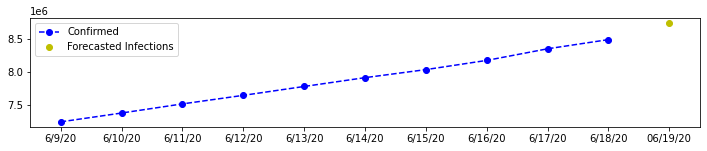

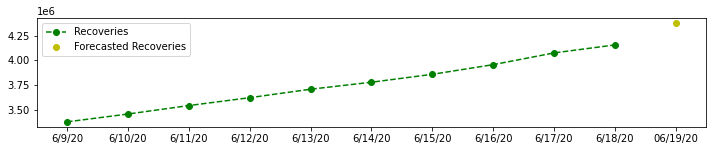

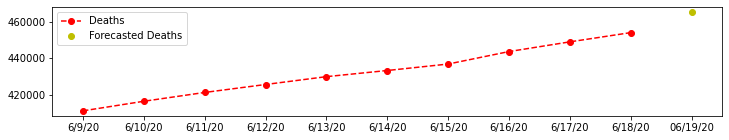

In [213]:
plt.figure(figsize=(12, 2))
plt.plot(df_conf[-10:], linestyle='--', marker='o', color='b', label='Confirmed')
plt.scatter(d1, fc_conf, color='y', label='Forecasted Infections')
plt.legend(loc="upper left")
plt.figure(figsize=(12, 2))
plt.plot(df_rec[-10:], linestyle='--', marker='o', color='g', label='Recoveries')
plt.scatter(d1, fc_rec, color='y', label='Forecasted Recoveries')
plt.legend(loc="upper left")
plt.figure(figsize=(12, 2))
plt.plot(df_dea[-10:], linestyle='--', marker='o', color='r', label='Deaths')
plt.scatter(d1, fc_dea, color='y', label='Forecasted Deaths')
plt.legend(loc="upper left")